In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import optuna
import os
import joblib
import dagshub
import mlflow
import sys
import mlflow.sklearn

# Toggle to control MLflow logging
ENABLE_MLFLOW = False  # Change it to True if you want to log into ML Flow

In [2]:
df = pd.read_csv(r"C:\Users\hruth\Desktop\AI engineer\Virtual Internship\week 3&4\datasets\survey_results.csv")
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30010 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   30010 non-null  object
 1   age                             30010 non-null  int64 
 2   gender                          30010 non-null  object
 3   zone                            30010 non-null  object
 4   occupation                      30010 non-null  object
 5   income_levels                   21946 non-null  object
 6   consume_frequency(weekly)       30002 non-null  object
 7   current_brand                   30010 non-null  object
 8   preferable_consumption_size     30010 non-null  object
 9   awareness_of_other_brands       30010 non-null  object
 10  reasons_for_choosing_brands     30010 non-null  object
 11  flavor_preference               30010 non-null  object
 12  purchase_channel                30000 non-null

In [4]:
df.describe()

,age
count,30010.000000
mean,33.047684
std,13.439250
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


In [5]:
df.duplicated().sum()

np.int64(10)

In [6]:
df[df.duplicated()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
11317,R11312,18,F,Urban,Student,NaN,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150
19050,R19044,57,M,Semi-Urban,Retired,<10L,3-4 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),150-200
22412,R22405,26,M,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
23406,R23398,27,M,Urban,Working Professional,10L - 15L,5-7 times,Newcomer,Large (1 L),above 4,Availability,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
25068,R25059,34,F,Urban,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Eco-Friendly,High (Very health-conscious),"Active (eg. Sports, gym)",150-200


In [7]:
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.duplicated().sum()

np.int64(0)

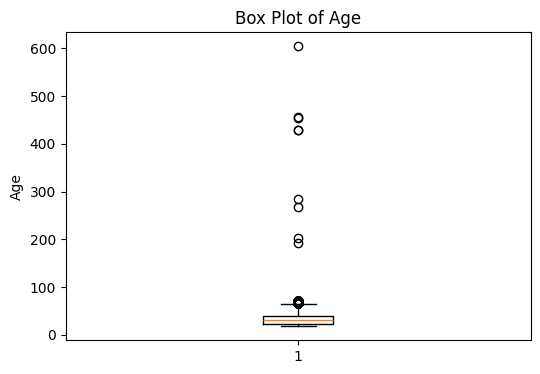

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(df['age'], vert=True)
plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.show()

In [10]:
invalid_ages = df[df['age'] > 100]
invalid_ages

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3097,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6259,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12397,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22541,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22910,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24949,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24951,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25095,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28760,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


In [11]:
df['occupation'] = df['occupation'].astype(str).str.strip().str.lower()

In [12]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

df = df[(df['age'] >= 18) & (df['age'] <= 70)].reset_index(drop=True)
print("Rows after valid age filtering:", df.shape[0])

Rows after valid age filtering: 29991


In [13]:
df['age'].describe()

count    29991.000000
mean        32.947484
std         11.906077
min         18.000000
25%         23.000000
50%         31.000000
75%         40.000000
max         70.000000
Name: age, dtype: float64

In [14]:
df[df["age"]>70]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range


In [15]:
df['consume_frequency(weekly)'].mode()[0]

'3-4 times'

In [16]:
df['zone'].value_counts()

zone
Metro         11906
Urban         10686
Semi-Urban     5274
Rural          2116
urbna             5
Metor             4
Name: count, dtype: int64

In [17]:
#handiling the missing data

df['income_levels'] = df['income_levels'].fillna('Not Reported')

df['consume_frequency(weekly)'] = df['consume_frequency(weekly)'].fillna(
    df['consume_frequency(weekly)'].mode()[0]
)

df['purchase_channel'] = df['purchase_channel'].fillna(
    df['purchase_channel'].mode()[0]
)

In [18]:
# spelling mistakes in caegorical data

df['zone'] = df['zone'].str.lower().str.strip()
df['current_brand'] = df['current_brand'].str.lower().str.strip()

df["zone"] = df["zone"].replace({
    "metor": "metro",
    "urbna": "urban"
})

df['current_brand'] = df['current_brand'].replace({
    'establishd': 'established'
})

In [19]:
#df.to_csv("output.csv", index=False)

In [20]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[17,25,35,45,55,70,float('inf')],
    labels=['18-25','26-35','36-45','46-55','56-70','70+']
)

# Drop age column
df = df.drop(columns=['age'])

In [21]:
df["age_group"].head()

0    26-35
1    46-55
2    36-45
3    26-35
4    18-25
Name: age_group, dtype: category
Categories (6, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-70' < '70+']

In [22]:
# getting cf_ab_score

consume_frequency_map = {
    "0-2 times" : 1,
    "3-4 times" : 2,
    "5-7 times" : 3
}

awerness_of_other_brands_map = {
    "0 to 1" : 1,
    "2 to 4" : 2,
    "above 4" : 3
}


df["frequency_score"] = df["consume_frequency(weekly)"].map(consume_frequency_map)
df["awareness_score"] = df["awareness_of_other_brands"].map(awerness_of_other_brands_map)

df["cf_ab_score"] = df["frequency_score"]/(df["awareness_score"] + df["frequency_score"])
df["cf_ab_score"] = df["cf_ab_score"].round(2)

In [23]:
df['zone'].unique()

array(['urban', 'metro', 'rural', 'semi-urban'], dtype=object)

In [24]:
df['income_levels'].unique()

array(['<10L', '> 35L', '16L - 25L', 'Not Reported', '10L - 15L',
       '26L - 35L'], dtype=object)

In [25]:
# getting zas_score
df['income_levels'] = df['income_levels'].str.lower().str.strip()

zone_map = {
    "rural" : 1,
    "semi-urban" : 2,
    "urban" : 3,
    "metro" : 4
}

income_map = {
    "not reported": 0,
    "<10l": 1,
    "10l - 15l": 2,
    "16l - 25l": 3,
    "26l - 35l": 4,
    "> 35l": 5
}

df["zone_score"] = df["zone"].map(zone_map)
df["income_score"] = df["income_levels"].map(income_map)

df["zas_score"] = df["zone_score"] * df["income_score"]
df["zas_score"] = df["zas_score"].round(2)

In [26]:
df = df.drop(columns=['zone_score', 'income_score'], errors = "ignore")
df = df.drop(columns=['frequency_score', 'awareness_score'], errors ='ignore')

In [27]:
df['current_brand'].unique()

array(['newcomer', 'established'], dtype=object)

In [28]:
df['reasons_for_choosing_brands'] = df['reasons_for_choosing_brands'].str.lower().str.strip()

df['bsi'] = (
    (df['current_brand'] != 'established') &
    (df['reasons_for_choosing_brands'].isin(['price', 'quality']))
).astype(int)

In [29]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,urban,working professional,<10l,3-4 times,newcomer,Medium (500 ml),0 to 1,price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,metro,working professional,> 35l,5-7 times,established,Medium (500 ml),2 to 4,quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,rural,working professional,> 35l,3-4 times,newcomer,Medium (500 ml),2 to 4,availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,urban,working professional,16l - 25l,5-7 times,newcomer,Medium (500 ml),0 to 1,brand reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,metro,student,not reported,3-4 times,established,Medium (500 ml),0 to 1,availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [30]:
df.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi'],
      dtype='object')

In [31]:
df["cf_ab_score"].max()

np.float64(0.75)

In [32]:
df["zas_score"].unique()

array([ 3, 20,  5,  9,  0,  6, 12,  2,  4,  8, 15, 16,  1, 10])

In [33]:
bad1 = df[(df['age_group'] == '56-70') & (df['occupation'] == 'student')]
bad2 = df[(df['age_group'] == '18-25') & (df['occupation'] == 'retired')]
bad3 = df[(df['age_group'] == '18-25') & (df['occupation'] == 'homemaker')]

print(len(bad1), len(bad2), len(bad3))

35 0 0


In [34]:
df = df.drop(bad1.index).reset_index(drop=True)

In [35]:
df.shape

(29956, 20)

In [36]:
df[df['bsi'] == 0].shape[0]

20796

In [37]:
df.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi'],
      dtype='object')

In [38]:
df.dtypes

respondent_id                       object
gender                              object
zone                                object
occupation                          object
income_levels                       object
consume_frequency(weekly)           object
current_brand                       object
preferable_consumption_size         object
awareness_of_other_brands           object
reasons_for_choosing_brands         object
flavor_preference                   object
purchase_channel                    object
packaging_preference                object
health_concerns                     object
typical_consumption_situations      object
price_range                         object
age_group                         category
cf_ab_score                        float64
zas_score                            int64
bsi                                  int64
dtype: object

In [39]:
# splitting into independent and dependent variables 

X = df.drop(columns = ["respondent_id", "price_range"])
y = df["price_range"]

In [40]:
X.shape

(29956, 18)

In [41]:
y.shape

(29956,)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42, stratify = y)

In [43]:
X_train.shape, X_test.shape

((22467, 18), (7489, 18))

In [44]:
y_train.shape, y_test.shape

((22467,), (7489,))

In [45]:
from sklearn.preprocessing import LabelEncoder

label_cols = [
    'age_group',
    'income_levels',
    'health_concerns',
    'consume_frequency(weekly)',
    'preferable_consumption_size'
]

label_encoders = {}   # <-- store each encoder

for col in label_cols:
    le = LabelEncoder()

    # Fit on training data
    X_train[col] = le.fit_transform(X_train[col])

    X_test[col] = le.transform(X_test[col])

    # Save encoder
    label_encoders[col] = le

# Save all encoders to one file
os.makedirs("Artifacts/encoders", exist_ok=True)
joblib.dump(label_encoders, "Artifacts/encoders/train_label_encoders.pkl")

print("Label encoders saved successfully!")

Label encoders saved successfully!


In [46]:
# Encode the target
le_price = LabelEncoder()
y_train = le_price.fit_transform(y_train)
y_test  = le_price.transform(y_test)

# Save the price_range encoder
joblib.dump(le_price, "Artifacts/encoders/price_range_label_encoder.pkl")

print("Price range encoder saved!")

Price range encoder saved!


In [47]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

onehot_cols = [
    'gender',
    'zone',
    'occupation',
    'current_brand',
    'awareness_of_other_brands',
    'reasons_for_choosing_brands',
    'flavor_preference',
    'purchase_channel',
    'packaging_preference',
    'typical_consumption_situations'
]

# Fit on training data
ohe.fit(X_train[onehot_cols])

# Transform train/test
train_ohe = ohe.transform(X_train[onehot_cols])
test_ohe  = ohe.transform(X_test[onehot_cols])

# Get feature names
ohe_features = ohe.get_feature_names_out(onehot_cols)

# Add to X_train, X_test
X_train[ohe_features] = train_ohe
X_test[ohe_features]  = test_ohe

# Drop original categorical columns
X_train.drop(columns=onehot_cols, inplace=True)
X_test.drop(columns=onehot_cols, inplace=True)

# SAVE the OneHotEncoder
joblib.dump(ohe, "Artifacts/encoders/onehot_encoder.pkl")

print("OneHotEncoder saved successfully!")

OneHotEncoder saved successfully!


In [48]:
X_train.shape, X_test.shape

((22467, 27), (7489, 27))

In [49]:
X_train.head(2)

,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,zone_rural,...,awareness_of_other_brands_above 4,reasons_for_choosing_brands_brand reputation,reasons_for_choosing_brands_price,reasons_for_choosing_brands_quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
10996,3,2,2,0,1,0.50,3,1,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
25400,1,0,1,2,3,0.25,12,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [50]:
X_test.head(2)

,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,zone_rural,...,awareness_of_other_brands_above 4,reasons_for_choosing_brands_brand reputation,reasons_for_choosing_brands_price,reasons_for_choosing_brands_quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
28430,5,0,0,0,0,0.50,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3610,3,1,2,1,1,0.67,2,1,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [51]:
y_train.shape, y_test.shape

((22467,), (7489,))

In [52]:
y_train

array([2, 2, 1, ..., 0, 2, 3], shape=(22467,))

In [53]:
y_test

array([3, 0, 2, ..., 0, 0, 0], shape=(7489,))

In [54]:
# scaling the X_train and X_test

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Save inside existing encoders/ folder
joblib.dump(sc, "Artifacts/encoders/scaler.pkl")

print("Scaler saved successfully!")

Scaler saved successfully!


In [55]:
X_train

array([[ 0.24063502,  1.23355365,  1.22938867, ...,  1.0401057 ,
        -0.70866528,  1.56781937],
       [-0.83579048, -1.34164146, -0.11664814, ..., -0.96144075,
        -0.70866528,  1.56781937],
       [-0.83579048, -1.34164146,  1.22938867, ..., -0.96144075,
         1.41110343, -0.63782858],
       ...,
       [ 0.24063502, -0.05404391, -1.46268494, ..., -0.96144075,
        -0.70866528, -0.63782858],
       [-0.83579048,  1.23355365,  1.22938867, ..., -0.96144075,
         1.41110343, -0.63782858],
       [ 1.31706053, -1.34164146,  1.22938867, ...,  1.0401057 ,
        -0.70866528, -0.63782858]], shape=(22467, 27))

In [56]:
X_test

array([[ 1.31706053, -1.34164146, -1.46268494, ..., -0.96144075,
         1.41110343, -0.63782858],
       [ 0.24063502, -0.05404391,  1.22938867, ..., -0.96144075,
         1.41110343, -0.63782858],
       [ 0.77884777,  1.23355365, -1.46268494, ...,  1.0401057 ,
        -0.70866528, -0.63782858],
       ...,
       [ 1.31706053, -0.05404391, -1.46268494, ...,  1.0401057 ,
        -0.70866528,  1.56781937],
       [ 0.24063502, -1.34164146, -0.11664814, ..., -0.96144075,
         1.41110343, -0.63782858],
       [-1.37400323, -0.05404391, -0.11664814, ...,  1.0401057 ,
        -0.70866528, -0.63782858]], shape=(7489, 27))

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    C = 0.228106838302619,
    penalty = 'l2',
    solver = 'lbfgs',
    max_iter = 1000,
    random_state = 42
)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

Accuracy : 0.8062491654426492

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1948
           1       0.75      0.77      0.76      2199
           2       0.90      0.89      0.90      2428
           3       0.81      0.75      0.78       914

    accuracy                           0.81      7489
   macro avg       0.80      0.79      0.80      7489
weighted avg       0.81      0.81      0.81      7489



In [58]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(
    var_smoothing = 0.009900957034187585
)

nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

Accuracy : 0.5721725196955535

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.48      0.31      0.38      1948
           1       0.55      0.36      0.44      2199
           2       0.70      0.86      0.77      2428
           3       0.44      0.89      0.59       914

    accuracy                           0.57      7489
   macro avg       0.54      0.60      0.54      7489
weighted avg       0.57      0.57      0.55      7489



In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 249,
    max_depth = 42,
    min_samples_split = 4,
    min_samples_leaf = 2,
    bootstrap = False,
    random_state = 42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Accuracy : 0.9007878221391374

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1948
           1       0.85      0.89      0.87      2199
           2       0.94      0.93      0.94      2428
           3       0.93      0.89      0.91       914

    accuracy                           0.90      7489
   macro avg       0.91      0.90      0.90      7489
weighted avg       0.90      0.90      0.90      7489



In [60]:
from sklearn.svm import SVC

svm = SVC(
    C = 1.2427326080095387,
    gamma = 0.11565003896016061,
    kernel = 'rbf',
    probability = True,
    random_state = 42
)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Accuracy : 0.8603284817732675

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1948
           1       0.80      0.83      0.81      2199
           2       0.92      0.90      0.91      2428
           3       0.91      0.87      0.89       914

    accuracy                           0.86      7489
   macro avg       0.87      0.86      0.86      7489
weighted avg       0.86      0.86      0.86      7489



In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    max_depth = 5,
    learning_rate = 0.18645060823508722,
    n_estimators = 354,
    subsample = 0.9132403456260648,
    colsample_bytree = 0.5074421169480205,
    gamma = 0.20203693931618974,
    eval_metric = "mlogloss",
    random_state = 42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

Accuracy : 0.9288289491253839

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1948
           1       0.90      0.92      0.91      2199
           2       0.97      0.95      0.96      2428
           3       0.94      0.92      0.93       914

    accuracy                           0.93      7489
   macro avg       0.93      0.93      0.93      7489
weighted avg       0.93      0.93      0.93      7489



In [62]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    num_leaves = 35,
    learning_rate = 0.04073062905508371,
    n_estimators = 236,
    min_child_samples = 44,
    subsample = 0.9686419293049904,
    colsample_bytree = 0.9414701274247627,
    random_state = 42
)

lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_lgb))
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 27
[LightGBM] [Info] Start training from score -1.346461
[LightGBM] [Info] Start training from score -1.225281
[LightGBM] [Info] Start training from score -1.126505
[LightGBM] [Info] Start training from score -2.103725


C:\Users\hruth\anaconda3\envs\pytorch_envs\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy : 0.9248230738416344

Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1948
           1       0.89      0.92      0.90      2199
           2       0.96      0.95      0.95      2428
           3       0.94      0.92      0.93       914

    accuracy                           0.92      7489
   macro avg       0.93      0.92      0.92      7489
weighted avg       0.93      0.92      0.92      7489



In [63]:
os.makedirs("Artifacts/models", exist_ok=True)

In [64]:
joblib.dump(lr, "Artifacts/models/logistic_regression.pkl")
joblib.dump(nb, "Artifacts/models/naive_bayes.pkl")
joblib.dump(rf, "Artifacts/models/random_forest.pkl", compress=3)
joblib.dump(svm, "Artifacts/models/svm.pkl")
joblib.dump(xgb, "Artifacts/models/xgboost.pkl")
joblib.dump(lgb, "Artifacts/models/lightgbm.pkl")

print("✔ All models saved successfully!")

✔ All models saved successfully!


In [65]:
if ENABLE_MLFLOW:
    dagshub.init("CodeX_Project", "HruthikExploiter", mlflow=True)
    mlflow.set_tracking_uri("https://dagshub.com/HruthikExploiter/CodeX_Project")

In [66]:
def log_model(model, model_name, params, X_test, y_test, model_path):

    print(f"▶ Starting logging for {model_name}")
    sys.stdout.flush()

    try:
        mlflow.set_experiment(model_name)
        print("Experiment set")
        sys.stdout.flush()

        with mlflow.start_run(run_name=model_name):
            
            print("Run started")
            sys.stdout.flush()

            # prediction
            y_pred = model.predict(X_test)
            print("Prediction done")
            sys.stdout.flush()

            metrics = {
                "accuracy": accuracy_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred, average='weighted'),
                "recall": recall_score(y_test, y_pred, average='weighted'),
                "f1_score": f1_score(y_test, y_pred, average='weighted')
            }
            print("Metrics calculated")
            sys.stdout.flush()

            mlflow.log_metrics(metrics)
            mlflow.log_params(params)
            print("Params & metrics logged")
            sys.stdout.flush()

            mlflow.log_artifact(model_path)
            print("Model artifact logged")
            sys.stdout.flush()

            print(f"✔ Finished logging {model_name}")
            sys.stdout.flush()

    except Exception as e:
        print(f"❌ ERROR in {model_name}: {e}")
        sys.stdout.flush()


In [67]:
best_lr_params = {
    "C": 0.228106838302619,
    "penalty": "l2",
    "solver": "lbfgs",
    "max_iter": 1000,
    "random_state": 42
}

if ENABLE_MLFLOW:
    log_model(
        lr,
        "LogisticRegression",
        {},
        X_test,
        y_test,
        "models/logistic_regression.pkl"
    )


In [68]:
best_nb_params = {
    "var_smoothing": 0.009900957034187585
}

if ENABLE_MLFLOW:
    log_model(
        nb,
        "NaiveBayes",
        {},
        X_test,
        y_test,
        "models/naive_bayes.pkl"
    )

In [69]:
best_svm_params = {
    "C": 1.2427326080095387,
    "gamma": 0.11565003896016061,
    "kernel": "rbf",
    "probability": True,
    "random_state": 42
}


if ENABLE_MLFLOW:
    log_model(
        svm,
        "SVM",
        {},
        X_test,
        y_test,
        "models/svm.pkl"
    )

In [70]:
best_xgb_params = {
    "max_depth": 5,
    "learning_rate": 0.18645060823508722,
    "n_estimators": 354,
    "subsample": 0.9132403456260648,
    "colsample_bytree": 0.5074421169480205,
    "gamma": 0.20203693931618974,
    "eval_metric": "mlogloss",
    "random_state": 42
}

if ENABLE_MLFLOW:
    log_model(
        xgb,
        "XGBoost",
        {},
        X_test,
        y_test,
        "models/xgboost.pkl"
    )

In [71]:
best_lgb_params = {
    "num_leaves": 35,
    "learning_rate": 0.04073062905508371,
    "n_estimators": 236,
    "min_child_samples": 44,
    "subsample": 0.9686419293049904,
    "colsample_bytree": 0.9414701274247627,
    "random_state": 42
}

if ENABLE_MLFLOW:
    log_model(
        lgb,
        "LightGBM",
        {},
        X_test,
        y_test,
        "models/lightgbm.pkl"
    )

In [72]:
best_rf_params = {
    "n_estimators": 249,
    "max_depth": 42,
    "min_samples_split": 4,
    "min_samples_leaf": 2,
    "bootstrap": False,
    "random_state": 42
}

if ENABLE_MLFLOW:
    log_model(
        rf,
        "RandomForest",
        {},
        X_test,
        y_test,
        "models/random_forest.pkl"
    )